In [1]:
pip install xlwings

In [3]:
import xlwings as xw 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import random 
import scipy as sp
import numpy as np

In [4]:
cenario = xw.Book('Simulação Cenario 1 pasto.xlsx')
receita = cenario.sheets['Dados para Receita']
custos = cenario.sheets['Dados para custos']
saidas = cenario.sheets['Projeção Fluxo de caixa']

In [73]:
precoleite=pd.read_csv('precoleite.csv', index_col=0)
precoleite['Minas Gerais'].describe()

count    14.000000
mean      1.824286
std       0.152604
min       1.520000
25%       1.735000
50%       1.800000
75%       1.955000
max       2.050000
Name: Minas Gerais, dtype: float64

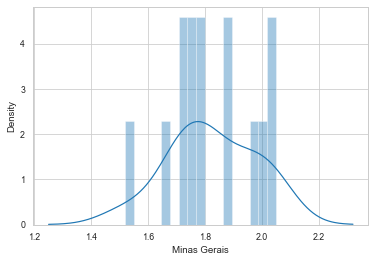

In [85]:
plt.subplots()
sns.distplot(precoleite['Minas Gerais'], bins=17)
plt.show()

In [68]:
sp.stats.normaltest(precoleite['Minas Gerais'])

C:\Users\Pablo\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.11426668743810724, pvalue=0.9444681220776446)

In [69]:
sp.stats.kstest(precoleite['Minas Gerais'],'expon')

KstestResult(statistic=0.7812881130477852, pvalue=1.4866349384886839e-09)

In [70]:
sp.stats.kstest(precoleite['Minas Gerais'],'norm')

KstestResult(statistic=0.9357445121810641, pvalue=4.090469382176102e-17)

In [72]:
sp.stats.kstest(precoleite['Minas Gerais'],'uniform')

KstestResult(statistic=1.0, pvalue=0.0)

<AxesSubplot:>

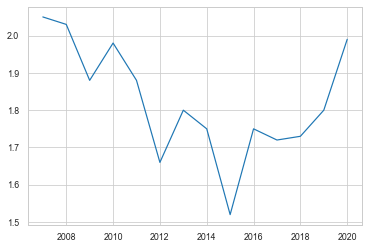

In [71]:
precoleite['Minas Gerais'].plot()

In [182]:
def simulacaomcleite(num_inter, book, diariomenor, diariomaior, precoleite):
    cenario = xw.Book(book)
    receita = cenario.sheets['Dados para Receita']
    custos = cenario.sheets['Dados para custos']
    saidas = cenario.sheets['Projeção Fluxo de caixa']
    allvpl=[]
    alltir=[]
    racao=['B30','C30', 'D30', 'E30','F30','G30','H30', 'I30', 'J30', 'K30']
    leite=['B19', 'C19', 'D19', 'E19', 'F19', 'G19', 'H19', 'I19', 'J19', 'K19']
    litro=['B20', 'C20', 'D20', 'E20', 'F20', 'G20', 'H20', 'I20', 'J20', 'K20']
    for i in range(num_inter):
        for cell in racao:
            custos.range(cell).value=random.triangular(low=1.89, high=2.31, mode=2.10) 
        for cell in leite:
            receita.range(cell).value = random.gauss(precoleite,0.152604)
        for cell in litro:
            receita.range(cell).value = random.triangular(low=diariomenor, high=diariomaior, mode=(diariomenor+diariomaior)/2)
        vpl=saidas.range('P2').value
        tir=saidas.range('P3').value
        allvpl.append(vpl)
        alltir.append(tir)
    allvpl=pd.DataFrame(allvpl)
    alltir=pd.DataFrame(alltir)
    vplpositivo = allvpl>=0
    result=vplpositivo.mean()
    allvplprob=allvpl.quantile([.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])
    sns.set_context(context='paper')
    sns.set_style(style='whitegrid')
    plt.subplots(figsize=(15,5))
    plt.subplot(1, 3, 1)
    sns.distplot(allvpl, bins=50) 
    plt.subplot(1, 3, 2)
    sns.distplot(alltir, bins=50)
    plt.subplot(1, 3, 3)
    return alltir.describe(percentiles=[.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]), allvpl.describe(percentiles=[.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95]), result, sns.lineplot(x= allvplprob[0],y=allvplprob.index, data=allvplprob)

C:\Users\Pablo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pablo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(                  0
 count  10000.000000
 mean       0.001115
 std        0.019485
 min       -0.076380
 5%        -0.032140
 10%       -0.024416
 15%       -0.018718
 20%       -0.014702
 25%       -0.011483
 30%       -0.008426
 35%       -0.005957
 40%       -0.003388
 45%       -0.000781
 50%        0.001432
 55%        0.003920
 60%        0.006578
 65%        0.009116
 70%        0.011525
 75%        0.014345
 80%        0.017354
 85%        0.020949
 90%        0.025848
 95%        0.032163
 max        0.068572,
                    0
 count   10000.000000
 mean  -160614.390962
 std    105436.820642
 min   -542201.420941
 5%    -335415.129031
 10%   -296545.730104
 15%   -268989.675477
 20%   -247878.441728
 25%   -230827.161611
 30%   -215741.600250
 35%   -201383.969350
 40%   -188488.843612
 45%   -174313.238618
 50%   -161487.341598
 55%   -148622.785636
 60%   -133620.902609
 65%   -119099.345554
 70%   -106016.160293
 75%    -90246.917710
 80%    -72901.893613
 85%    -523

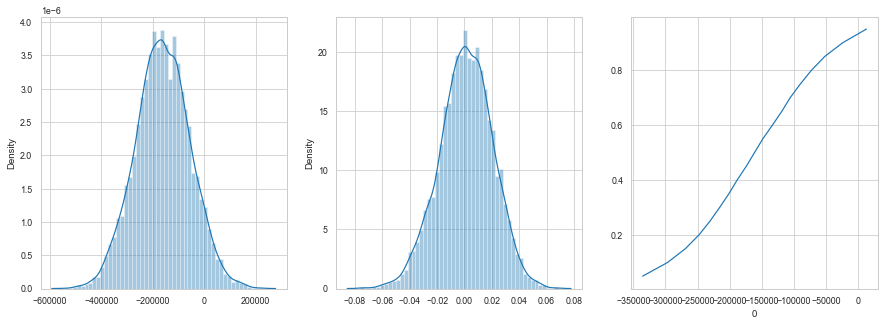

In [183]:
simulacaomcleite(num_inter=10000, book='Simulação Cenario 1 pasto.xlsx', diariomenor=10, diariomaior=20, precoleite=2)

C:\Users\Pablo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pablo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(                  0
 count  10000.000000
 mean       0.040102
 std        0.020557
 min       -0.041113
 5%         0.006155
 10%        0.013661
 15%        0.018870
 20%        0.023124
 25%        0.026471
 30%        0.029447
 35%        0.032688
 40%        0.035211
 45%        0.037851
 50%        0.040207
 55%        0.042701
 60%        0.045413
 65%        0.047857
 70%        0.050884
 75%        0.054099
 80%        0.057490
 85%        0.061266
 90%        0.066002
 95%        0.073468
 max        0.119833,
                   0
 count  1.000000e+04
 mean   1.375534e+05
 std    2.666786e+05
 min   -7.759436e+05
 5%    -2.906241e+05
 10%   -2.008818e+05
 15%   -1.372558e+05
 20%   -8.564261e+04
 25%   -4.442415e+04
 30%   -6.901399e+03
 35%    3.431897e+04
 40%    6.650856e+04
 45%    9.967618e+04
 50%    1.319596e+05
 55%    1.644771e+05
 60%    1.992787e+05
 65%    2.330492e+05
 70%    2.720308e+05
 75%    3.174898e+05
 80%    3.629244e+05
 85%    4.132404e+05
 90%    4.82

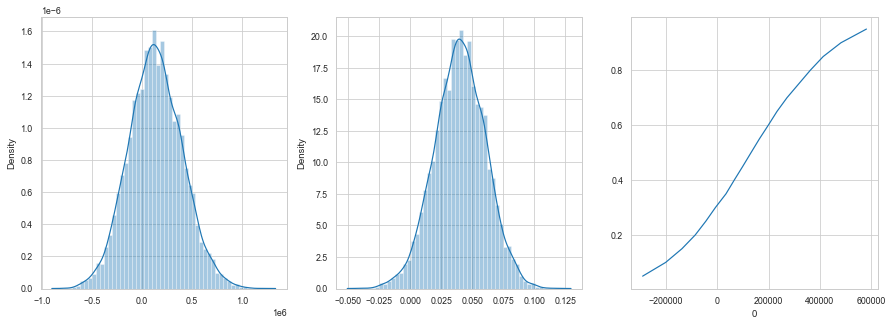

In [184]:
simulacaomcleite(num_inter=10000, book='Simulação Cenario 2 pasto.xlsx', diariomenor=10, diariomaior=20, precoleite=2.11)

C:\Users\Pablo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pablo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(                  0
 count  10000.000000
 mean       0.000842
 std        0.012547
 min       -0.060223
 5%        -0.020090
 10%       -0.015095
 15%       -0.011962
 20%       -0.009610
 25%       -0.007415
 30%       -0.005597
 35%       -0.003813
 40%       -0.002206
 45%       -0.000634
 50%        0.000921
 55%        0.002475
 60%        0.004071
 65%        0.005717
 70%        0.007487
 75%        0.009311
 80%        0.011421
 85%        0.013978
 90%        0.016868
 95%        0.021429
 max        0.051432,
                   0
 count  1.000000e+04
 mean  -4.004206e+05
 std    1.657556e+05
 min   -1.092569e+06
 5%    -6.685661e+05
 10%   -6.100647e+05
 15%   -5.707767e+05
 20%   -5.394819e+05
 25%   -5.131250e+05
 30%   -4.882564e+05
 35%   -4.658001e+05
 40%   -4.435468e+05
 45%   -4.235570e+05
 50%   -4.029833e+05
 55%   -3.823687e+05
 60%   -3.600814e+05
 65%   -3.386011e+05
 70%   -3.155012e+05
 75%   -2.903555e+05
 80%   -2.624617e+05
 85%   -2.270148e+05
 90%   -1.85

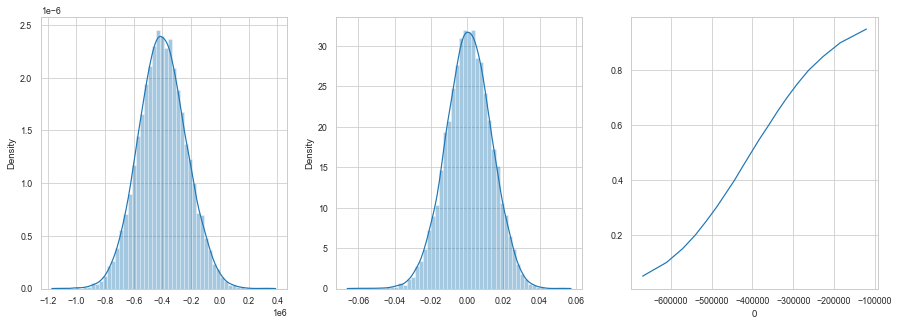

In [185]:
simulacaomcleite(num_inter=10000, book='Simulação Cenario 3 confinado.xlsx', diariomenor=25, diariomaior=35, precoleite=2.11)

C:\Users\Pablo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pablo\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(                  0
 count  10000.000000
 mean       0.038043
 std        0.013417
 min       -0.014395
 5%         0.015929
 10%        0.020809
 15%        0.024283
 20%        0.026840
 25%        0.029102
 30%        0.031088
 35%        0.032990
 40%        0.034737
 45%        0.036545
 50%        0.038192
 55%        0.039809
 60%        0.041420
 65%        0.043211
 70%        0.045044
 75%        0.046987
 80%        0.049182
 85%        0.052051
 90%        0.055355
 95%        0.060159
 max        0.087096,
                   0
 count  1.000000e+04
 mean   2.266567e+05
 std    3.700778e+05
 min   -1.119520e+06
 5%    -3.756727e+05
 10%   -2.432715e+05
 15%   -1.526903e+05
 20%   -8.400755e+04
 25%   -2.455818e+04
 30%    2.925584e+04
 35%    8.080680e+04
 40%    1.291506e+05
 45%    1.777863e+05
 50%    2.234006e+05
 55%    2.688049e+05
 60%    3.145079e+05
 65%    3.642094e+05
 70%    4.155775e+05
 75%    4.680022e+05
 80%    5.328735e+05
 85%    6.150903e+05
 90%    7.08

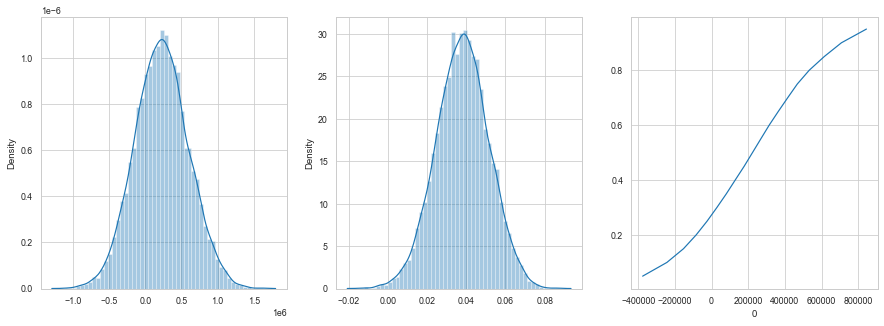

In [188]:
simulacaomcleite(num_inter=10000, book='Simulação Cenario 4 confinado.xlsx', diariomenor=25, diariomaior=35, precoleite=2.11)

In [3]:
def simulacaomcleite2(num_inter, book, diariomenor, diariomaior, precoleite):
    cenario = xw.Book(book)
    receita = cenario.sheets['Dados para Receita']
    custos = cenario.sheets['Dados para custos']
    saidas = cenario.sheets['Projeção Fluxo de caixa']
    allvpl=[]
    alltir=[]
    racao=['B30','C30', 'D30', 'E30','F30','G30','H30', 'I30', 'J30', 'K30']
    leite=['B19', 'C19', 'D19', 'E19', 'F19', 'G19', 'H19', 'I19', 'J19', 'K19']
    litro=['B20', 'C20', 'D20', 'E20', 'F20', 'G20', 'H20', 'I20', 'J20', 'K20']
    for i in range(num_inter):
        for cell in racao:
            custos.range(cell).value=random.triangular(low=1.89, high=2.31, mode=2.10) 
        for cell in leite:
            receita.range(cell).value = random.gauss(precoleite,0.152604)
        for cell in litro:
            receita.range(cell).value = random.triangular(low=diariomenor, high=diariomaior, mode=(diariomenor+diariomaior)/2)
        vpl=saidas.range('P2').value
        allvpl.append(vpl)
    allvpl=pd.DataFrame(allvpl)
    allvplprob=allvpl.quantile([0, .05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95, 1])
    sns.set_context(context='paper')
    sns.set_style(style='whitegrid')
    return sns.lineplot(x= allvplprob[0],y=allvplprob.index, data=allvplprob), plt.legend(['Cenário 1 Pasto','Cenario 2 Pasto', 'Cenario 3 Confinado', 'Cenario 4 Confinado']), plt.xlabel('VPL'), plt.ylabel('Probabilidade')

(<AxesSubplot:xlabel='VPL', ylabel='Probabilidade'>,
 Text(0.5, 0, 'VPL'),
 Text(0, 0.5, 'Probabilidade'))

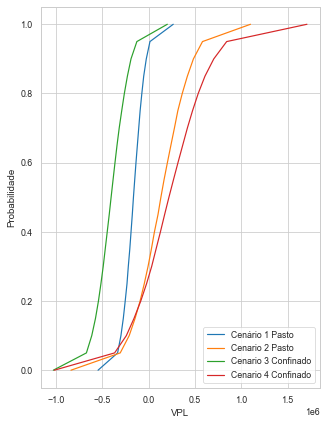

In [6]:
plt.subplots(figsize=(5,7))
simulacaomcleite2(num_inter=10000, book='Simulação Cenario 1 pasto.xlsx', diariomenor=10, diariomaior=20, precoleite=2)
simulacaomcleite2(num_inter=10000, book='Simulação Cenario 2 pasto.xlsx', diariomenor=10, diariomaior=20, precoleite=2.11)
simulacaomcleite2(num_inter=10000, book='Simulação Cenario 3 confinado.xlsx', diariomenor=25, diariomaior=35, precoleite=2.11)
simulacaomcleite2(num_inter=10000, book='Simulação Cenario 4 confinado.xlsx', diariomenor=25, diariomaior=35, precoleite=2.11)

In [10]:
def simulacaomcleite3(num_inter, book, diariomenor, diariomaior, precoleite):
    cenario = xw.Book(book)
    receita = cenario.sheets['Dados para Receita']
    custos = cenario.sheets['Dados para custos']
    saidas = cenario.sheets['Projeção Fluxo de caixa']
    alltir=[]
    racao=['B30','C30', 'D30', 'E30','F30','G30','H30', 'I30', 'J30', 'K30']
    leite=['B19', 'C19', 'D19', 'E19', 'F19', 'G19', 'H19', 'I19', 'J19', 'K19']
    litro=['B20', 'C20', 'D20', 'E20', 'F20', 'G20', 'H20', 'I20', 'J20', 'K20']
    for i in range(num_inter):
        for cell in racao:
            custos.range(cell).value=random.triangular(low=1.89, high=2.31, mode=2.10) 
        for cell in leite:
            receita.range(cell).value = random.gauss(precoleite,0.152604)
        for cell in litro:
            receita.range(cell).value = random.triangular(low=diariomenor, high=diariomaior, mode=(diariomenor+diariomaior)/2)
        tir=saidas.range('P3').value
        alltir.append(tir)

    alltir=pd.DataFrame(alltir)
    alltir.dropna(inplace=True)
    alltir['prob'] = alltir[0].rank(pct=True)
    inviavel=[]
    viavel=[]
    recomendavel=[]
    for (tir, prob) in zip(alltir[0], alltir['prob']):
        if tir < 0.03:
            inviavel.append(prob)
        else: 
            recomendavel.append(prob)
    categoria=pd.DataFrame([inviavel, recomendavel])
    categoria=categoria.T
    labels = book 
    return categoria

Text(0.5, 1.0, 'Cenario')

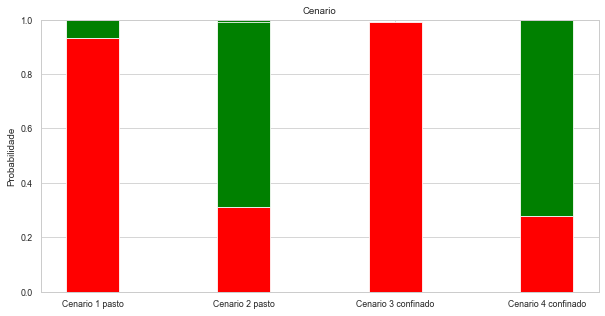

In [13]:

categoria=simulacaomcleite3(num_inter=10000, book='Simulação Cenario 1 pasto.xlsx', diariomenor=10, diariomaior=20, precoleite=2)
categoria1=categoria
labels1='Cenario 1 pasto'
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(labels1, categoria1[0].max(), 0.35, label='Inviavel', color='red')
ax.bar(labels1, categoria1[1].max(), 0.35, bottom=categoria1[0].max(),
       label='Recomendavel', color='green')
ax.set_ylim(0, 1)
categoria=simulacaomcleite3(num_inter=10000, book='Simulação Cenario 2 pasto.xlsx', diariomenor=10, diariomaior=20, precoleite=2.11)
categoria2=categoria
labels2='Cenario 2 pasto'
ax.bar(labels2, categoria2[0].max(), 0.35, label='Inviavel', color='red')
ax.bar(labels2, categoria2[1].max(), 0.35, bottom=categoria2[0].max(),
       label='Recomendavel', color='green')
ax.set_ylim(0, 1)
categoria=simulacaomcleite3(num_inter=10000, book='Simulação Cenario 3 confinado.xlsx', diariomenor=25, diariomaior=35, precoleite=2.11)
categoria3=categoria
labels3='Cenario 3 confinado'
ax.bar(labels3, categoria3[0].max(), 0.35, label='Inviavel', color='red')
ax.bar(labels2, categoria3[1].max(), 0.35, bottom=categoria3[0].max(),
       label='Recomendavel', color='green')
ax.set_ylim(0, 1)
categoria=simulacaomcleite3(num_inter=10000, book='Simulação Cenario 4 confinado.xlsx', diariomenor=25, diariomaior=35, precoleite=2.11)
categoria4=categoria
labels4='Cenario 4 confinado'
ax.bar(labels4, categoria4[0].max(), 0.35, label='Inviavel', color='red')
ax.bar(labels4, categoria4[1].max(), 0.35, bottom=categoria4[0].max(),
       label='Recomendavel', color='green')
ax.set_ylim(0, 1)
ax.set_ylabel('Probabilidade')
ax.set_title('Cenario')

In [4]:
def simulacaomcleite4(num_inter, book, diariomenor, diariomaior, precoleite):
    cenario = xw.Book(book)
    receita = cenario.sheets['Dados para Receita']
    custos = cenario.sheets['Dados para custos']
    saidas = cenario.sheets['Projeção Fluxo de caixa']
    allvpl=[]
    alltir=[]
    racao=['B30','C30', 'D30', 'E30','F30','G30','H30', 'I30', 'J30', 'K30']
    leite=['B19', 'C19', 'D19', 'E19', 'F19', 'G19', 'H19', 'I19', 'J19', 'K19']
    litro=['B20', 'C20', 'D20', 'E20', 'F20', 'G20', 'H20', 'I20', 'J20', 'K20']
    for i in range(num_inter):
        for cell in racao:
            custos.range(cell).value=random.triangular(low=1.89, high=2.31, mode=2.10) 
        for cell in leite:
            receita.range(cell).value = random.gauss(precoleite,0.152604)
        for cell in litro:
            receita.range(cell).value = random.triangular(low=diariomenor, high=diariomaior, mode=(diariomenor+diariomaior)/2)
        tir=saidas.range('P3').value
        alltir.append(tir)
    alltir=pd.DataFrame(alltir)
    alltirprob=alltir.quantile([0, .05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95, 1])
    sns.set_context(context='paper')
    sns.set_style(style='whitegrid')
    return sns.lineplot(x= alltirprob[0],y=alltirprob.index, data=alltirprob), plt.legend(['Cenário 1 Pasto','Cenario 2 Pasto', 'Cenario 3 Confinado', 'Cenario 4 Confinado']), plt.xlabel('TIR'), plt.ylabel('Probabilidade')

(<AxesSubplot:xlabel='VPL', ylabel='Probabilidade'>,
 Text(0.5, 0, 'VPL'),
 Text(0, 0.5, 'Probabilidade'))

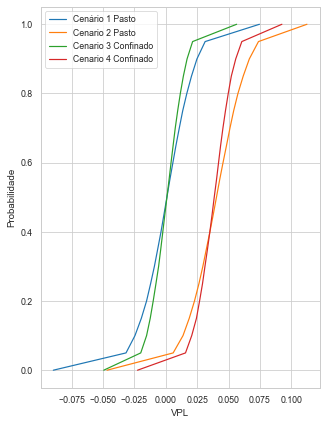

In [7]:
plt.subplots(figsize=(5,7))
simulacaomcleite4(num_inter=10000, book='Simulação Cenario 1 pasto.xlsx', diariomenor=10, diariomaior=20, precoleite=2)
simulacaomcleite4(num_inter=10000, book='Simulação Cenario 2 pasto.xlsx', diariomenor=10, diariomaior=20, precoleite=2.11)
simulacaomcleite4(num_inter=10000, book='Simulação Cenario 3 confinado.xlsx', diariomenor=25, diariomaior=35, precoleite=2.11)
simulacaomcleite4(num_inter=10000, book='Simulação Cenario 4 confinado.xlsx', diariomenor=25, diariomaior=35, precoleite=2.11)